In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# log messages experiment 1
log_messages_1 = '''
Time taken to create and process 1000 samples for amino acid length 5: 0.21 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.16 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.27 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.43 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.54 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.72 seconds
Time taken to create and process 1000 samples for amino acid length 35: 1.02 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.15 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.42 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.74 seconds
Time taken to create and process 1000 samples for amino acid length 55: 1.99 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.47 seconds
Time taken to create and process 1000 samples for amino acid length 65: 3.09 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.27 seconds
Time taken to create and process 1000 samples for amino acid length 75: 3.84 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.39 seconds
Time taken to create and process 1000 samples for amino acid length 85: 4.82 seconds
Time taken to create and process 1000 samples for amino acid length 90: 5.07 seconds
Time taken to create and process 1000 samples for amino acid length 95: 5.67 seconds
Time taken to create and process 1000 samples for amino acid length 100: 6.35 seconds
Time taken to create and process 1000 samples for amino acid length 105: 7.11 seconds
Time taken to create and process 1000 samples for amino acid length 110: 7.49 seconds
Time taken to create and process 1000 samples for amino acid length 115: 8.50 seconds
Time taken to create and process 1000 samples for amino acid length 120: 9.09 seconds
Time taken to create and process 1000 samples for amino acid length 125: 9.54 seconds
Time taken to create and process 1000 samples for amino acid length 130: 10.19 seconds
Time taken to create and process 1000 samples for amino acid length 135: 11.08 seconds
Time taken to create and process 1000 samples for amino acid length 140: 11.84 seconds
Time taken to create and process 1000 samples for amino acid length 145: 12.84 seconds
Time taken to create and process 1000 samples for amino acid length 150: 13.86 seconds
Time taken to create and process 1000 samples for amino acid length 155: 14.69 seconds
Time taken to create and process 1000 samples for amino acid length 160: 15.13 seconds
Time taken to create and process 1000 samples for amino acid length 165: 16.79 seconds
Time taken to create and process 1000 samples for amino acid length 170: 17.99 seconds
Time taken to create and process 1000 samples for amino acid length 175: 18.03 seconds
Time taken to create and process 1000 samples for amino acid length 180: 19.57 seconds
Time taken to create and process 1000 samples for amino acid length 185: 20.94 seconds
Time taken to create and process 1000 samples for amino acid length 190: 21.82 seconds
Time taken to create and process 1000 samples for amino acid length 195: 23.32 seconds
Time taken to create and process 1000 samples for amino acid length 200: 24.92 seconds
CPU times: user 11min 1s, sys: 12 s, total: 11min 13s
Wall time: 11min 15s
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.14 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.17 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.27 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.41 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.61 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.80 seconds
Time taken to create and process 1000 samples for amino acid length 35: 1.46 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.49 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.76 seconds
Time taken to create and process 1000 samples for amino acid length 50: 2.02 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.32 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.67 seconds
Time taken to create and process 1000 samples for amino acid length 65: 3.14 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.66 seconds
Time taken to create and process 1000 samples for amino acid length 75: 4.00 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.71 seconds
Time taken to create and process 1000 samples for amino acid length 85: 5.02 seconds
Time taken to create and process 1000 samples for amino acid length 90: 5.77 seconds
Time taken to create and process 1000 samples for amino acid length 95: 6.57 seconds
Time taken to create and process 1000 samples for amino acid length 100: 6.97 seconds
Time taken to create and process 1000 samples for amino acid length 105: 7.71 seconds
Time taken to create and process 1000 samples for amino acid length 110: 8.67 seconds
Time taken to create and process 1000 samples for amino acid length 115: 9.33 seconds
Time taken to create and process 1000 samples for amino acid length 120: 10.30 seconds
Time taken to create and process 1000 samples for amino acid length 125: 12.15 seconds
Time taken to create and process 1000 samples for amino acid length 130: 12.87 seconds
Time taken to create and process 1000 samples for amino acid length 135: 13.08 seconds
Time taken to create and process 1000 samples for amino acid length 140: 13.44 seconds
Time taken to create and process 1000 samples for amino acid length 145: 13.75 seconds
Time taken to create and process 1000 samples for amino acid length 150: 15.26 seconds
Time taken to create and process 1000 samples for amino acid length 155: 15.93 seconds
Time taken to create and process 1000 samples for amino acid length 160: 17.90 seconds
Time taken to create and process 1000 samples for amino acid length 165: 18.29 seconds
Time taken to create and process 1000 samples for amino acid length 170: 18.87 seconds
Time taken to create and process 1000 samples for amino acid length 175: 20.56 seconds
Time taken to create and process 1000 samples for amino acid length 180: 21.04 seconds
Time taken to create and process 1000 samples for amino acid length 185: 22.66 seconds
Time taken to create and process 1000 samples for amino acid length 190: 23.52 seconds
Time taken to create and process 1000 samples for amino acid length 195: 24.97 seconds
Time taken to create and process 1000 samples for amino acid length 200: 26.83 seconds
CPU times: user 11min 48s, sys: 13.9 s, total: 12min 2s
Wall time: 12min 7s
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.12 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.17 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.28 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.43 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.62 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.87 seconds
Time taken to create and process 1000 samples for amino acid length 35: 1.03 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.45 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.50 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.81 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.14 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.50 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.96 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.86 seconds
Time taken to create and process 1000 samples for amino acid length 75: 4.39 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.65 seconds
Time taken to create and process 1000 samples for amino acid length 85: 4.92 seconds
Time taken to create and process 1000 samples for amino acid length 90: 5.53 seconds
Time taken to create and process 1000 samples for amino acid length 95: 6.24 seconds
Time taken to create and process 1000 samples for amino acid length 100: 6.86 seconds
Time taken to create and process 1000 samples for amino acid length 105: 7.42 seconds
Time taken to create and process 1000 samples for amino acid length 110: 8.02 seconds
Time taken to create and process 1000 samples for amino acid length 115: 8.78 seconds
Time taken to create and process 1000 samples for amino acid length 120: 9.34 seconds
Time taken to create and process 1000 samples for amino acid length 125: 10.09 seconds
Time taken to create and process 1000 samples for amino acid length 130: 11.27 seconds
Time taken to create and process 1000 samples for amino acid length 135: 12.15 seconds
Time taken to create and process 1000 samples for amino acid length 140: 13.26 seconds
Time taken to create and process 1000 samples for amino acid length 145: 14.60 seconds
Time taken to create and process 1000 samples for amino acid length 150: 14.88 seconds
Time taken to create and process 1000 samples for amino acid length 155: 16.27 seconds
Time taken to create and process 1000 samples for amino acid length 160: 17.19 seconds
Time taken to create and process 1000 samples for amino acid length 165: 18.39 seconds
Time taken to create and process 1000 samples for amino acid length 170: 19.25 seconds
Time taken to create and process 1000 samples for amino acid length 175: 20.31 seconds
Time taken to create and process 1000 samples for amino acid length 180: 22.03 seconds
Time taken to create and process 1000 samples for amino acid length 185: 22.49 seconds
Time taken to create and process 1000 samples for amino acid length 190: 24.66 seconds
Time taken to create and process 1000 samples for amino acid length 195: 24.96 seconds
Time taken to create and process 1000 samples for amino acid length 200: 26.72 seconds
CPU times: user 11min 50s, sys: 26.5 s, total: 12min 17s
Wall time: 12min 22s
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.11 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.16 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.27 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.39 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.56 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.95 seconds
Time taken to create and process 1000 samples for amino acid length 35: 1.07 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.22 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.42 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.71 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.01 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.45 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.76 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.13 seconds
Time taken to create and process 1000 samples for amino acid length 75: 3.56 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.11 seconds
Time taken to create and process 1000 samples for amino acid length 85: 4.60 seconds
Time taken to create and process 1000 samples for amino acid length 90: 5.05 seconds
Time taken to create and process 1000 samples for amino acid length 95: 5.61 seconds
Time taken to create and process 1000 samples for amino acid length 100: 6.17 seconds
Time taken to create and process 1000 samples for amino acid length 105: 7.01 seconds
Time taken to create and process 1000 samples for amino acid length 110: 7.56 seconds
Time taken to create and process 1000 samples for amino acid length 115: 7.99 seconds
Time taken to create and process 1000 samples for amino acid length 120: 8.70 seconds
Time taken to create and process 1000 samples for amino acid length 125: 9.70 seconds
Time taken to create and process 1000 samples for amino acid length 130: 10.46 seconds
Time taken to create and process 1000 samples for amino acid length 135: 11.43 seconds
Time taken to create and process 1000 samples for amino acid length 140: 12.19 seconds
Time taken to create and process 1000 samples for amino acid length 145: 12.74 seconds
Time taken to create and process 1000 samples for amino acid length 150: 13.92 seconds
Time taken to create and process 1000 samples for amino acid length 155: 14.99 seconds
Time taken to create and process 1000 samples for amino acid length 160: 16.53 seconds
Time taken to create and process 1000 samples for amino acid length 165: 16.56 seconds
Time taken to create and process 1000 samples for amino acid length 170: 17.36 seconds
Time taken to create and process 1000 samples for amino acid length 175: 18.39 seconds
Time taken to create and process 1000 samples for amino acid length 180: 19.50 seconds
Time taken to create and process 1000 samples for amino acid length 185: 21.25 seconds
Time taken to create and process 1000 samples for amino acid length 190: 22.92 seconds
Time taken to create and process 1000 samples for amino acid length 195: 23.85 seconds
Time taken to create and process 1000 samples for amino acid length 200: 25.44 seconds
CPU times: user 11min 15s, sys: 12.9 s, total: 11min 28s
Wall time: 11min 31s
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.11 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.17 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.48 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.45 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.64 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.78 seconds
Time taken to create and process 1000 samples for amino acid length 35: 1.04 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.26 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.51 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.81 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.11 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.41 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.99 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.23 seconds
Time taken to create and process 1000 samples for amino acid length 75: 3.53 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.05 seconds
Time taken to create and process 1000 samples for amino acid length 85: 4.52 seconds
Time taken to create and process 1000 samples for amino acid length 90: 5.55 seconds
Time taken to create and process 1000 samples for amino acid length 95: 5.99 seconds
Time taken to create and process 1000 samples for amino acid length 100: 6.92 seconds
Time taken to create and process 1000 samples for amino acid length 105: 7.23 seconds
Time taken to create and process 1000 samples for amino acid length 110: 7.86 seconds
Time taken to create and process 1000 samples for amino acid length 115: 8.60 seconds
Time taken to create and process 1000 samples for amino acid length 120: 9.19 seconds
Time taken to create and process 1000 samples for amino acid length 125: 9.98 seconds
Time taken to create and process 1000 samples for amino acid length 130: 10.43 seconds
Time taken to create and process 1000 samples for amino acid length 135: 11.36 seconds
Time taken to create and process 1000 samples for amino acid length 140: 11.80 seconds
Time taken to create and process 1000 samples for amino acid length 145: 12.74 seconds
Time taken to create and process 1000 samples for amino acid length 150: 13.65 seconds
Time taken to create and process 1000 samples for amino acid length 155: 15.15 seconds
Time taken to create and process 1000 samples for amino acid length 160: 16.03 seconds
Time taken to create and process 1000 samples for amino acid length 165: 16.60 seconds
Time taken to create and process 1000 samples for amino acid length 170: 17.95 seconds
Time taken to create and process 1000 samples for amino acid length 175: 18.53 seconds
Time taken to create and process 1000 samples for amino acid length 180: 19.32 seconds
Time taken to create and process 1000 samples for amino acid length 185: 20.99 seconds
Time taken to create and process 1000 samples for amino acid length 190: 21.81 seconds
Time taken to create and process 1000 samples for amino acid length 195: 22.67 seconds
Time taken to create and process 1000 samples for amino acid length 200: 24.51 seconds
CPU times: user 11min 21s, sys: 24.9 s, total: 11min 46s
Wall time: 11min 50s
Dataset Generated!
'''

In [16]:
# log messages experiment 2
log_messages_2 = '''
Time taken to create and process 1000 samples for amino acid length 5: 0.09 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.19 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.23 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.35 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.48 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.65 seconds
Time taken to create and process 1000 samples for amino acid length 35: 0.86 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.20 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.40 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.67 seconds
Time taken to create and process 1000 samples for amino acid length 55: 1.98 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.30 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.74 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.13 seconds
Time taken to create and process 1000 samples for amino acid length 75: 3.56 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.07 seconds
Time taken to create and process 1000 samples for amino acid length 85: 4.51 seconds
Time taken to create and process 1000 samples for amino acid length 90: 5.08 seconds
Time taken to create and process 1000 samples for amino acid length 95: 5.60 seconds
Time taken to create and process 1000 samples for amino acid length 100: 6.21 seconds
Time taken to create and process 1000 samples for amino acid length 105: 7.07 seconds
Time taken to create and process 1000 samples for amino acid length 110: 7.38 seconds
Time taken to create and process 1000 samples for amino acid length 115: 8.05 seconds
Time taken to create and process 1000 samples for amino acid length 120: 8.78 seconds
Time taken to create and process 1000 samples for amino acid length 125: 9.46 seconds
Time taken to create and process 1000 samples for amino acid length 130: 10.44 seconds
Time taken to create and process 1000 samples for amino acid length 135: 11.13 seconds
Time taken to create and process 1000 samples for amino acid length 140: 11.97 seconds
Time taken to create and process 1000 samples for amino acid length 145: 12.91 seconds
Time taken to create and process 1000 samples for amino acid length 150: 13.77 seconds
Time taken to create and process 1000 samples for amino acid length 155: 14.64 seconds
Time taken to create and process 1000 samples for amino acid length 160: 15.85 seconds
Time taken to create and process 1000 samples for amino acid length 165: 16.76 seconds
Time taken to create and process 1000 samples for amino acid length 170: 17.45 seconds
Time taken to create and process 1000 samples for amino acid length 175: 18.79 seconds
Time taken to create and process 1000 samples for amino acid length 180: 20.51 seconds
Time taken to create and process 1000 samples for amino acid length 185: 21.23 seconds
Time taken to create and process 1000 samples for amino acid length 190: 22.64 seconds
Time taken to create and process 1000 samples for amino acid length 195: 24.14 seconds
Time taken to create and process 1000 samples for amino acid length 200: 25.47 seconds
CPU times: user 11min 9s, sys: 14.3 s, total: 11min 23s
Wall time: 11min 24s
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.10 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.15 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.22 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.35 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.74 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.65 seconds
Time taken to create and process 1000 samples for amino acid length 35: 0.86 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.10 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.38 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.69 seconds
Time taken to create and process 1000 samples for amino acid length 55: 1.99 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.60 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.65 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.41 seconds
Time taken to create and process 1000 samples for amino acid length 75: 3.57 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.23 seconds
Time taken to create and process 1000 samples for amino acid length 85: 4.79 seconds
Time taken to create and process 1000 samples for amino acid length 90: 5.05 seconds
Time taken to create and process 1000 samples for amino acid length 95: 6.20 seconds
Time taken to create and process 1000 samples for amino acid length 100: 6.18 seconds
Time taken to create and process 1000 samples for amino acid length 105: 7.18 seconds
Time taken to create and process 1000 samples for amino acid length 110: 8.52 seconds
Time taken to create and process 1000 samples for amino acid length 115: 8.42 seconds
Time taken to create and process 1000 samples for amino acid length 120: 9.21 seconds
Time taken to create and process 1000 samples for amino acid length 125: 9.91 seconds
Time taken to create and process 1000 samples for amino acid length 130: 10.32 seconds
Time taken to create and process 1000 samples for amino acid length 135: 12.08 seconds
Time taken to create and process 1000 samples for amino acid length 140: 12.50 seconds
Time taken to create and process 1000 samples for amino acid length 145: 13.08 seconds
Time taken to create and process 1000 samples for amino acid length 150: 14.47 seconds
Time taken to create and process 1000 samples for amino acid length 155: 15.40 seconds
Time taken to create and process 1000 samples for amino acid length 160: 15.76 seconds
Time taken to create and process 1000 samples for amino acid length 165: 16.85 seconds
Time taken to create and process 1000 samples for amino acid length 170: 19.16 seconds
Time taken to create and process 1000 samples for amino acid length 175: 18.58 seconds
Time taken to create and process 1000 samples for amino acid length 180: 20.13 seconds
Time taken to create and process 1000 samples for amino acid length 185: 20.93 seconds
Time taken to create and process 1000 samples for amino acid length 190: 22.16 seconds
Time taken to create and process 1000 samples for amino acid length 195: 23.41 seconds
Time taken to create and process 1000 samples for amino acid length 200: 25.12 seconds
CPU times: user 11min 29s, sys: 28.2 s, total: 11min 57s
Wall time: 12min 10s
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.10 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.14 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.23 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.36 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.47 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.69 seconds
Time taken to create and process 1000 samples for amino acid length 35: 0.92 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.29 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.33 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.63 seconds
Time taken to create and process 1000 samples for amino acid length 55: 1.99 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.37 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.63 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.02 seconds
Time taken to create and process 1000 samples for amino acid length 75: 3.46 seconds
Time taken to create and process 1000 samples for amino acid length 80: 3.95 seconds
Time taken to create and process 1000 samples for amino acid length 85: 4.32 seconds
Time taken to create and process 1000 samples for amino acid length 90: 4.89 seconds
Time taken to create and process 1000 samples for amino acid length 95: 5.44 seconds
Time taken to create and process 1000 samples for amino acid length 100: 6.08 seconds
Time taken to create and process 1000 samples for amino acid length 105: 6.94 seconds
Time taken to create and process 1000 samples for amino acid length 110: 7.43 seconds
Time taken to create and process 1000 samples for amino acid length 115: 8.11 seconds
Time taken to create and process 1000 samples for amino acid length 120: 8.73 seconds
Time taken to create and process 1000 samples for amino acid length 125: 9.44 seconds
Time taken to create and process 1000 samples for amino acid length 130: 10.24 seconds
Time taken to create and process 1000 samples for amino acid length 135: 10.95 seconds
Time taken to create and process 1000 samples for amino acid length 140: 12.00 seconds
Time taken to create and process 1000 samples for amino acid length 145: 12.83 seconds
Time taken to create and process 1000 samples for amino acid length 150: 13.52 seconds
Time taken to create and process 1000 samples for amino acid length 155: 14.82 seconds
Time taken to create and process 1000 samples for amino acid length 160: 15.45 seconds
Time taken to create and process 1000 samples for amino acid length 165: 17.09 seconds
Time taken to create and process 1000 samples for amino acid length 170: 17.83 seconds
Time taken to create and process 1000 samples for amino acid length 175: 18.56 seconds
Time taken to create and process 1000 samples for amino acid length 180: 19.98 seconds
Time taken to create and process 1000 samples for amino acid length 185: 20.47 seconds
Time taken to create and process 1000 samples for amino acid length 190: 22.21 seconds
Time taken to create and process 1000 samples for amino acid length 195: 23.77 seconds
Time taken to create and process 1000 samples for amino acid length 200: 24.95 seconds
CPU times: user 11min 17s, sys: 29.7 s, total: 11min 47s
Wall time: 11min 57s
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.16 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.24 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.37 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.52 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.83 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.91 seconds
Time taken to create and process 1000 samples for amino acid length 35: 1.17 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.41 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.70 seconds
Time taken to create and process 1000 samples for amino acid length 50: 2.04 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.34 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.72 seconds
Time taken to create and process 1000 samples for amino acid length 65: 3.14 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.59 seconds
Time taken to create and process 1000 samples for amino acid length 75: 4.03 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.63 seconds
Time taken to create and process 1000 samples for amino acid length 85: 5.29 seconds
Time taken to create and process 1000 samples for amino acid length 90: 5.52 seconds
Time taken to create and process 1000 samples for amino acid length 95: 6.04 seconds
Time taken to create and process 1000 samples for amino acid length 100: 6.77 seconds
Time taken to create and process 1000 samples for amino acid length 105: 7.41 seconds
Time taken to create and process 1000 samples for amino acid length 110: 8.84 seconds
Time taken to create and process 1000 samples for amino acid length 115: 8.89 seconds
Time taken to create and process 1000 samples for amino acid length 120: 9.44 seconds
Time taken to create and process 1000 samples for amino acid length 125: 10.03 seconds
Time taken to create and process 1000 samples for amino acid length 130: 11.21 seconds
Time taken to create and process 1000 samples for amino acid length 135: 12.22 seconds
Time taken to create and process 1000 samples for amino acid length 140: 12.71 seconds
Time taken to create and process 1000 samples for amino acid length 145: 13.73 seconds
Time taken to create and process 1000 samples for amino acid length 150: 14.67 seconds
Time taken to create and process 1000 samples for amino acid length 155: 15.95 seconds
Time taken to create and process 1000 samples for amino acid length 160: 17.19 seconds
Time taken to create and process 1000 samples for amino acid length 165: 18.34 seconds
Time taken to create and process 1000 samples for amino acid length 170: 19.29 seconds
Time taken to create and process 1000 samples for amino acid length 175: 21.16 seconds
Time taken to create and process 1000 samples for amino acid length 180: 22.23 seconds
Time taken to create and process 1000 samples for amino acid length 185: 23.30 seconds
Time taken to create and process 1000 samples for amino acid length 190: 24.82 seconds
Time taken to create and process 1000 samples for amino acid length 195: 25.68 seconds
Time taken to create and process 1000 samples for amino acid length 200: 26.76 seconds
CPU times: user 12min 19s, sys: 13.5 s, total: 12min 33s
Wall time: 12min 37s
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.17 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.26 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.40 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.56 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.90 seconds
Time taken to create and process 1000 samples for amino acid length 30: 1.15 seconds
Time taken to create and process 1000 samples for amino acid length 35: 1.32 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.59 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.99 seconds
Time taken to create and process 1000 samples for amino acid length 50: 2.24 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.85 seconds
Time taken to create and process 1000 samples for amino acid length 60: 3.14 seconds
Time taken to create and process 1000 samples for amino acid length 65: 3.59 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.84 seconds
Time taken to create and process 1000 samples for amino acid length 75: 4.33 seconds
Time taken to create and process 1000 samples for amino acid length 80: 5.01 seconds
Time taken to create and process 1000 samples for amino acid length 85: 5.36 seconds
Time taken to create and process 1000 samples for amino acid length 90: 5.92 seconds
Time taken to create and process 1000 samples for amino acid length 95: 6.99 seconds
Time taken to create and process 1000 samples for amino acid length 100: 7.31 seconds
Time taken to create and process 1000 samples for amino acid length 105: 8.02 seconds
Time taken to create and process 1000 samples for amino acid length 110: 8.71 seconds
Time taken to create and process 1000 samples for amino acid length 115: 9.22 seconds
Time taken to create and process 1000 samples for amino acid length 120: 9.87 seconds
Time taken to create and process 1000 samples for amino acid length 125: 10.58 seconds
Time taken to create and process 1000 samples for amino acid length 130: 11.54 seconds
Time taken to create and process 1000 samples for amino acid length 135: 12.37 seconds
Time taken to create and process 1000 samples for amino acid length 140: 13.17 seconds
Time taken to create and process 1000 samples for amino acid length 145: 14.40 seconds
Time taken to create and process 1000 samples for amino acid length 150: 15.26 seconds
Time taken to create and process 1000 samples for amino acid length 155: 16.29 seconds
Time taken to create and process 1000 samples for amino acid length 160: 16.62 seconds
Time taken to create and process 1000 samples for amino acid length 165: 17.68 seconds
Time taken to create and process 1000 samples for amino acid length 170: 18.89 seconds
Time taken to create and process 1000 samples for amino acid length 175: 20.33 seconds
Time taken to create and process 1000 samples for amino acid length 180: 21.00 seconds
Time taken to create and process 1000 samples for amino acid length 185: 23.45 seconds
Time taken to create and process 1000 samples for amino acid length 190: 24.27 seconds
Time taken to create and process 1000 samples for amino acid length 195: 25.78 seconds
Time taken to create and process 1000 samples for amino acid length 200: 26.79 seconds
CPU times: user 12min 34s, sys: 13.8 s, total: 12min 48s
Wall time: 12min 51s
Dataset Generated!
'''

In [17]:
# log messages experiment 3
log_messages_3 = """
Time taken to create and process 1000 samples for amino acid length 5: 0.25 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.17 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.29 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.40 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.59 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.81 seconds
Time taken to create and process 1000 samples for amino acid length 35: 1.12 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.74 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.85 seconds
Time taken to create and process 1000 samples for amino acid length 50: 2.43 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.14 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.71 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.87 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.37 seconds
Time taken to create and process 1000 samples for amino acid length 75: 3.76 seconds
Time taken to create and process 1000 samples for amino acid length 80: 5.13 seconds
Time taken to create and process 1000 samples for amino acid length 85: 6.27 seconds
Time taken to create and process 1000 samples for amino acid length 90: 6.47 seconds
Time taken to create and process 1000 samples for amino acid length 95: 11.51 seconds
Time taken to create and process 1000 samples for amino acid length 100: 9.61 seconds
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.09 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.16 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.25 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.39 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.52 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.67 seconds
Time taken to create and process 1000 samples for amino acid length 35: 0.92 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.13 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.62 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.82 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.06 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.36 seconds
Time taken to create and process 1000 samples for amino acid length 65: 3.05 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.25 seconds
Time taken to create and process 1000 samples for amino acid length 75: 4.72 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.35 seconds
Time taken to create and process 1000 samples for amino acid length 85: 5.41 seconds
Time taken to create and process 1000 samples for amino acid length 90: 10.47 seconds
Time taken to create and process 1000 samples for amino acid length 95: 7.06 seconds
Time taken to create and process 1000 samples for amino acid length 100: 12.97 seconds
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.10 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.17 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.25 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.38 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.77 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.77 seconds
Time taken to create and process 1000 samples for amino acid length 35: 0.97 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.21 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.45 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.80 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.14 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.75 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.79 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.22 seconds
Time taken to create and process 1000 samples for amino acid length 75: 3.64 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.22 seconds
Time taken to create and process 1000 samples for amino acid length 85: 4.82 seconds
Time taken to create and process 1000 samples for amino acid length 90: 9.68 seconds
Time taken to create and process 1000 samples for amino acid length 95: 20.37 seconds
Time taken to create and process 1000 samples for amino acid length 100: 33.56 seconds
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.09 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.15 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.25 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.39 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.55 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.71 seconds
Time taken to create and process 1000 samples for amino acid length 35: 0.89 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.42 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.39 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.70 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.01 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.36 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.74 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.53 seconds
Time taken to create and process 1000 samples for amino acid length 75: 3.88 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.49 seconds
Time taken to create and process 1000 samples for amino acid length 85: 7.75 seconds
Time taken to create and process 1000 samples for amino acid length 90: 16.72 seconds
Time taken to create and process 1000 samples for amino acid length 95: 20.96 seconds
Time taken to create and process 1000 samples for amino acid length 100: 9.23 seconds
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.08 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.15 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.26 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.38 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.51 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.69 seconds
Time taken to create and process 1000 samples for amino acid length 35: 0.85 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.10 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.39 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.69 seconds
Time taken to create and process 1000 samples for amino acid length 55: 1.98 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.71 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.77 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.31 seconds
Time taken to create and process 1000 samples for amino acid length 75: 4.95 seconds
Time taken to create and process 1000 samples for amino acid length 80: 5.07 seconds
Time taken to create and process 1000 samples for amino acid length 85: 4.62 seconds
Time taken to create and process 1000 samples for amino acid length 90: 6.17 seconds
Time taken to create and process 1000 samples for amino acid length 95: 7.04 seconds
Time taken to create and process 1000 samples for amino acid length 100: 7.03 seconds
Dataset Generated!
CPU times: user 12min 33s, sys: 9.71 s, total: 12min 42s
Wall time: 12min 45s
"""

In [18]:
# log messages experiment 4
log_messages_4 = """
Time taken to create and process 1000 samples for amino acid length 5: 0.11 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.16 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.30 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.39 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.55 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.73 seconds
Time taken to create and process 1000 samples for amino acid length 35: 0.99 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.16 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.39 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.70 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.00 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.38 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.77 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.49 seconds
Time taken to create and process 1000 samples for amino acid length 75: 3.75 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.05 seconds
Time taken to create and process 1000 samples for amino acid length 85: 5.06 seconds
Time taken to create and process 1000 samples for amino acid length 90: 13.07 seconds
Time taken to create and process 1000 samples for amino acid length 95: 6.60 seconds
Time taken to create and process 1000 samples for amino acid length 100: 7.28 seconds
CPU times: user 1min 48s, sys: 1.78 s, total: 1min 50s
Wall time: 1min 50s
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.11 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.16 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.26 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.39 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.67 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.71 seconds
Time taken to create and process 1000 samples for amino acid length 35: 0.89 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.15 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.41 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.75 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.12 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.32 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.79 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.10 seconds
Time taken to create and process 1000 samples for amino acid length 75: 3.68 seconds
Time taken to create and process 1000 samples for amino acid length 80: 5.40 seconds
Time taken to create and process 1000 samples for amino acid length 85: 4.54 seconds
Time taken to create and process 1000 samples for amino acid length 90: 6.63 seconds
Time taken to create and process 1000 samples for amino acid length 95: 24.97 seconds
Time taken to create and process 1000 samples for amino acid length 100: 44.50 seconds
CPU times: user 2min 38s, sys: 1.75 s, total: 2min 39s
Wall time: 2min 39s
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.11 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.28 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.26 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.38 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.52 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.69 seconds
Time taken to create and process 1000 samples for amino acid length 35: 0.90 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.25 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.38 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.67 seconds
Time taken to create and process 1000 samples for amino acid length 55: 1.96 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.47 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.79 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.19 seconds
Time taken to create and process 1000 samples for amino acid length 75: 3.61 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.22 seconds
Time taken to create and process 1000 samples for amino acid length 85: 5.53 seconds
Time taken to create and process 1000 samples for amino acid length 90: 5.35 seconds
Time taken to create and process 1000 samples for amino acid length 95: 10.17 seconds
Time taken to create and process 1000 samples for amino acid length 100: 6.33 seconds
CPU times: user 1min 44s, sys: 1.78 s, total: 1min 46s
Wall time: 1min 46s
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.10 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.16 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.26 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.40 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.54 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.90 seconds
Time taken to create and process 1000 samples for amino acid length 35: 0.91 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.16 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.48 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.76 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.23 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.45 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.82 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.28 seconds
Time taken to create and process 1000 samples for amino acid length 75: 4.79 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.26 seconds
Time taken to create and process 1000 samples for amino acid length 85: 5.23 seconds
Time taken to create and process 1000 samples for amino acid length 90: 5.57 seconds
Time taken to create and process 1000 samples for amino acid length 95: 50.76 seconds
Time taken to create and process 1000 samples for amino acid length 100: 6.52 seconds
CPU times: user 2min 27s, sys: 2.67 s, total: 2min 29s
Wall time: 2min 30s
Dataset Generated!
Time taken to create and process 1000 samples for amino acid length 5: 0.12 seconds
Time taken to create and process 1000 samples for amino acid length 10: 0.17 seconds
Time taken to create and process 1000 samples for amino acid length 15: 0.26 seconds
Time taken to create and process 1000 samples for amino acid length 20: 0.40 seconds
Time taken to create and process 1000 samples for amino acid length 25: 0.56 seconds
Time taken to create and process 1000 samples for amino acid length 30: 0.90 seconds
Time taken to create and process 1000 samples for amino acid length 35: 1.05 seconds
Time taken to create and process 1000 samples for amino acid length 40: 1.38 seconds
Time taken to create and process 1000 samples for amino acid length 45: 1.45 seconds
Time taken to create and process 1000 samples for amino acid length 50: 1.72 seconds
Time taken to create and process 1000 samples for amino acid length 55: 2.03 seconds
Time taken to create and process 1000 samples for amino acid length 60: 2.66 seconds
Time taken to create and process 1000 samples for amino acid length 65: 2.75 seconds
Time taken to create and process 1000 samples for amino acid length 70: 3.11 seconds
Time taken to create and process 1000 samples for amino acid length 75: 4.65 seconds
Time taken to create and process 1000 samples for amino acid length 80: 4.35 seconds
Time taken to create and process 1000 samples for amino acid length 85: 5.24 seconds
Time taken to create and process 1000 samples for amino acid length 90: 5.78 seconds
Time taken to create and process 1000 samples for amino acid length 95: 6.41 seconds
Time taken to create and process 1000 samples for amino acid length 100: 14.80 seconds
CPU times: user 1min 54s, sys: 1.98 s, total: 1min 56s
Wall time: 1min 56s
Dataset Generated!
"""

In [19]:
def create_dataset_from_log_variables(*log_vars):
    pattern = r"Time taken to create and process 1000 samples for amino acid length (\d+): ([\d.]+) seconds"
    all_matches = []
    experiment_labels = []

    for index, log_messages in enumerate(log_vars, start=1):
        matches = re.findall(pattern, log_messages)
        print(f"Log {index}: Found {len(matches)} matches")  # Debugging output

        last_aa_length = 0
        run_label = 'a'
        for match in matches:
            aa_length = int(match[0])
            if aa_length < last_aa_length:
                run_label = chr(ord(run_label) + 1)
            experiment_labels.append(f'Experiment {index}{run_label}')
            last_aa_length = aa_length
            all_matches.append(match)

    df = pd.DataFrame(all_matches, columns=['Amino Acid Length', 'Time Taken (seconds)'])
    df['Amino Acid Length'] = df['Amino Acid Length'].astype(int)
    df['Time Taken (seconds)'] = df['Time Taken (seconds)'].astype(float)
    df['Experiment'] = experiment_labels
    return df

# Example usage
timing_data = create_dataset_from_log_variables(log_messages_1, log_messages_2, log_messages_3, log_messages_4)
print(timing_data.Experiment.unique())

Log 1: Found 200 matches
Log 2: Found 200 matches
Log 3: Found 100 matches
Log 4: Found 100 matches
['Experiment 1a' 'Experiment 1b' 'Experiment 1c' 'Experiment 1d'
 'Experiment 1e' 'Experiment 2a' 'Experiment 2b' 'Experiment 2c'
 'Experiment 2d' 'Experiment 2e' 'Experiment 3a' 'Experiment 3b'
 'Experiment 3c' 'Experiment 3d' 'Experiment 3e' 'Experiment 4a'
 'Experiment 4b' 'Experiment 4c' 'Experiment 4d' 'Experiment 4e']


In [20]:
timing_data['Experiment Type'] = timing_data['Experiment'].str.extract(r'(Experiment \d)')
timing_data.head()

,Amino Acid Length,Time Taken (seconds),Experiment,Experiment Type
0,5,0.21,Experiment 1a,Experiment 1
1,10,0.16,Experiment 1a,Experiment 1
2,15,0.27,Experiment 1a,Experiment 1
3,20,0.43,Experiment 1a,Experiment 1
4,25,0.54,Experiment 1a,Experiment 1


In [21]:
experiment_1_data =  timing_data[timing_data['Experiment Type'] == 'Experiment 1'].groupby('Amino Acid Length').agg(
    Median_Time=('Time Taken (seconds)', 'median'),
    Mean_Time=('Time Taken (seconds)', 'mean'),
    Std_Time=('Time Taken (seconds)', 'std'),
    Max_Time=('Time Taken (seconds)', 'max'),
    Min_Time=('Time Taken (seconds)', 'min')
).reset_index()

experiment_1_descriptives = pd.DataFrame(experiment_1_data)
experiment_1_descriptives

experiment_2_data =  timing_data[timing_data['Experiment Type'] == 'Experiment 2'].groupby('Amino Acid Length').agg(
    Median_Time=('Time Taken (seconds)', 'median'),
    Mean_Time=('Time Taken (seconds)', 'mean'),
    Std_Time=('Time Taken (seconds)', 'std'),
    Max_Time=('Time Taken (seconds)', 'max'),
    Min_Time=('Time Taken (seconds)', 'min')
).reset_index()

experiment_2_descriptives = pd.DataFrame(experiment_2_data)
experiment_2_descriptives

experiment_3_data =  timing_data[timing_data['Experiment Type'] == 'Experiment 3'].groupby('Amino Acid Length').agg(
    Median_Time=('Time Taken (seconds)', 'median'),
    Mean_Time=('Time Taken (seconds)', 'mean'),
    Std_Time=('Time Taken (seconds)', 'std'),
    Max_Time=('Time Taken (seconds)', 'max'),
    Min_Time=('Time Taken (seconds)', 'min')
).reset_index()

experiment_3_descriptives = pd.DataFrame(experiment_3_data)
experiment_3_descriptives

experiment_4_data =  timing_data[timing_data['Experiment Type'] == 'Experiment 4'].groupby('Amino Acid Length').agg(
    Median_Time=('Time Taken (seconds)', 'median'),
    Mean_Time=('Time Taken (seconds)', 'mean'),
    Std_Time=('Time Taken (seconds)', 'std'),
    Max_Time=('Time Taken (seconds)', 'max'),
    Min_Time=('Time Taken (seconds)', 'min')
).reset_index()

experiment_4_descriptives = pd.DataFrame(experiment_4_data)
experiment_4_descriptives.head()

,Amino Acid Length,Median_Time,Mean_Time,Std_Time,Max_Time,Min_Time
0,5,0.11,0.110,0.007071,0.12,0.10
1,10,0.16,0.186,0.052726,0.28,0.16
2,15,0.26,0.268,0.017889,0.30,0.26
3,20,0.39,0.392,0.008367,0.40,0.38
4,25,0.55,0.568,0.058907,0.67,0.52


In [22]:
mean_timing_data = timing_data.groupby(['Amino Acid Length', 'Experiment Type'])['Time Taken (seconds)'].mean().reset_index()
mean_timing_data.head()

,Amino Acid Length,Experiment Type,Time Taken (seconds)
0,5,Experiment 1,0.138
1,5,Experiment 2,0.124
2,5,Experiment 3,0.122
3,5,Experiment 4,0.110
4,10,Experiment 1,0.166


In [23]:
experiment_1_data = mean_timing_data[mean_timing_data['Experiment Type'] == 'Experiment 1']
experiment_2_data = mean_timing_data[mean_timing_data['Experiment Type'] == 'Experiment 2']
experiment_3_data = mean_timing_data[mean_timing_data['Experiment Type'] == 'Experiment 3']
experiment_4_data = mean_timing_data[mean_timing_data['Experiment Type'] == 'Experiment 3']

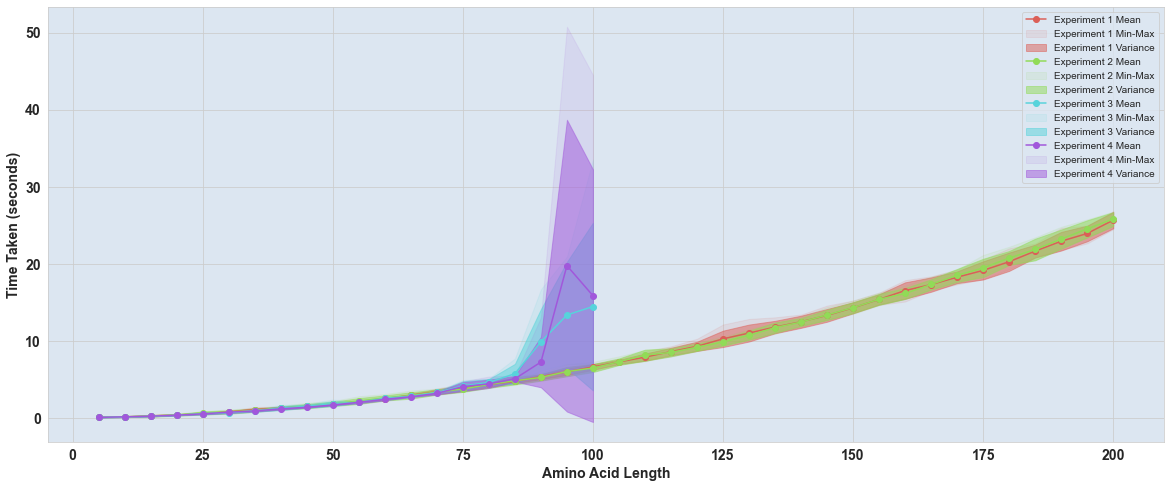

In [24]:
def plot_experiment_descriptives(experiment_data, experiment_name, color):

    # Convert DataFrame columns to NumPy arrays
    amino_acid_length = np.array(experiment_data['Amino Acid Length'])
    mean_time = np.array(experiment_data['Mean_Time'])
    std_time = np.array(experiment_data['Std_Time'])
    max_time = np.array(experiment_data['Max_Time'])
    min_time = np.array(experiment_data['Min_Time'])

    # Plot Mean
    plt.plot(amino_acid_length, mean_time, marker='o', color=color, label=f'{experiment_name} Mean')

    # Plot Min and Max
    plt.fill_between(amino_acid_length, min_time, max_time, color=color, alpha=0.1, label=f'{experiment_name} Min-Max')

    # Plot Variance (Standard Deviation)
    plt.fill_between(amino_acid_length, mean_time - std_time, mean_time + std_time, color=color, alpha=0.5, label=f'{experiment_name} Variance')

# Set the plot size and style
plt.figure(figsize=(20, 8))
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})

# Generate a color palette for each experiment
colors = sns.color_palette("hls", 4)

# Plot each experiment's descriptive statistics
plot_experiment_descriptives(experiment_1_descriptives, 'Experiment 1', colors[0])
plot_experiment_descriptives(experiment_2_descriptives, 'Experiment 2', colors[1])
plot_experiment_descriptives(experiment_3_descriptives, 'Experiment 3', colors[2])
plot_experiment_descriptives(experiment_4_descriptives, 'Experiment 4', colors[3])

# Customize the plot
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.xlabel("Amino Acid Length", fontsize=14, fontweight='bold')
plt.ylabel("Time Taken (seconds)", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()


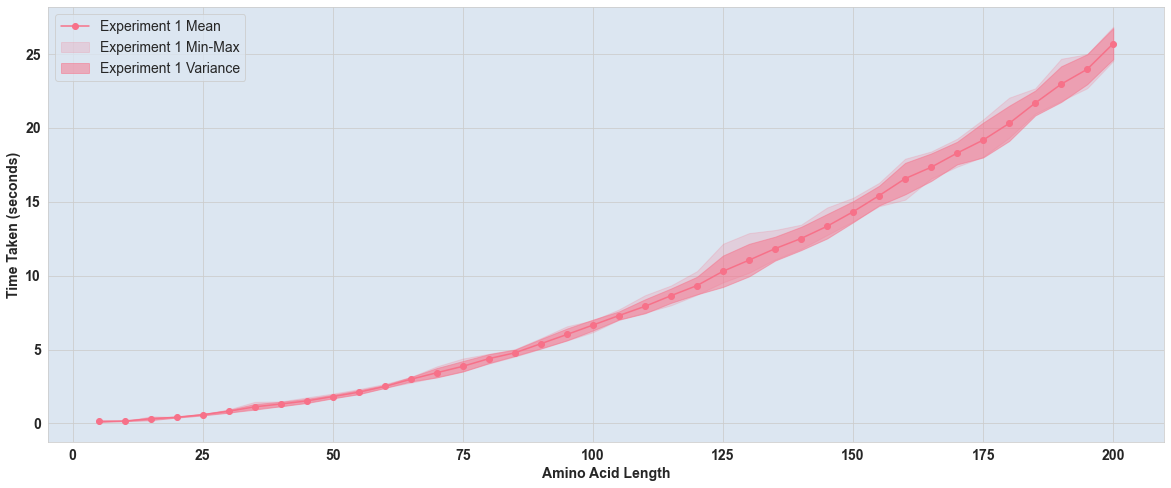

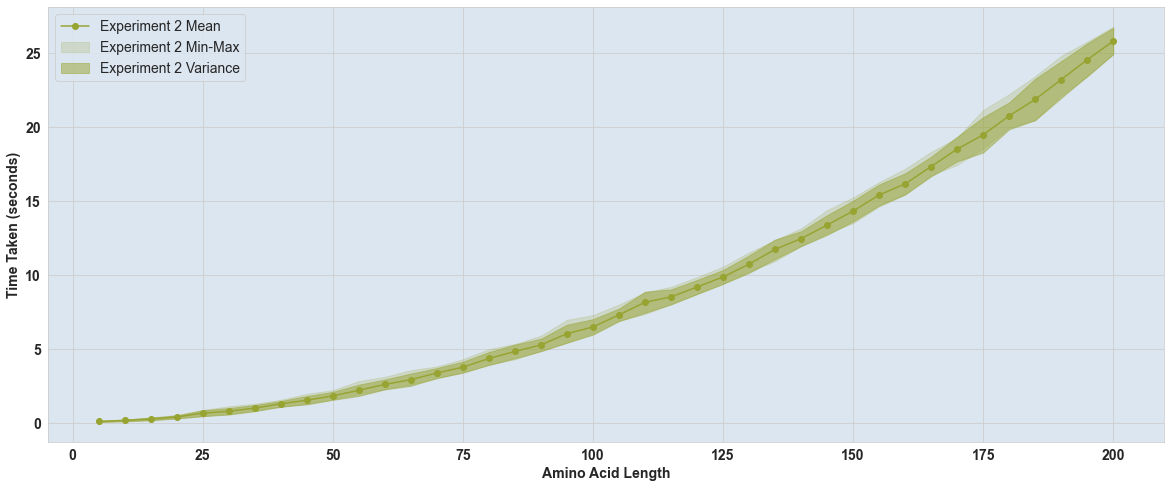

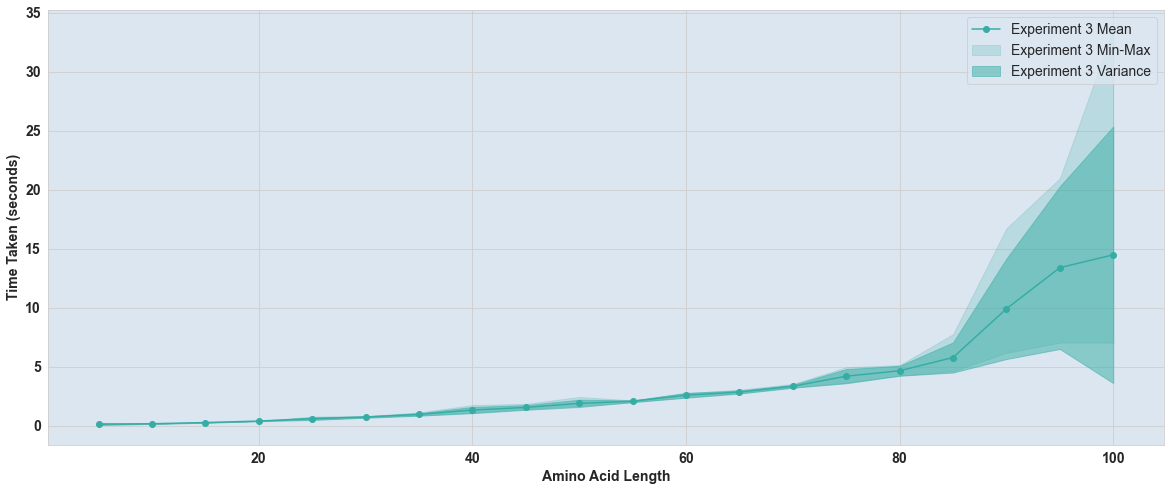

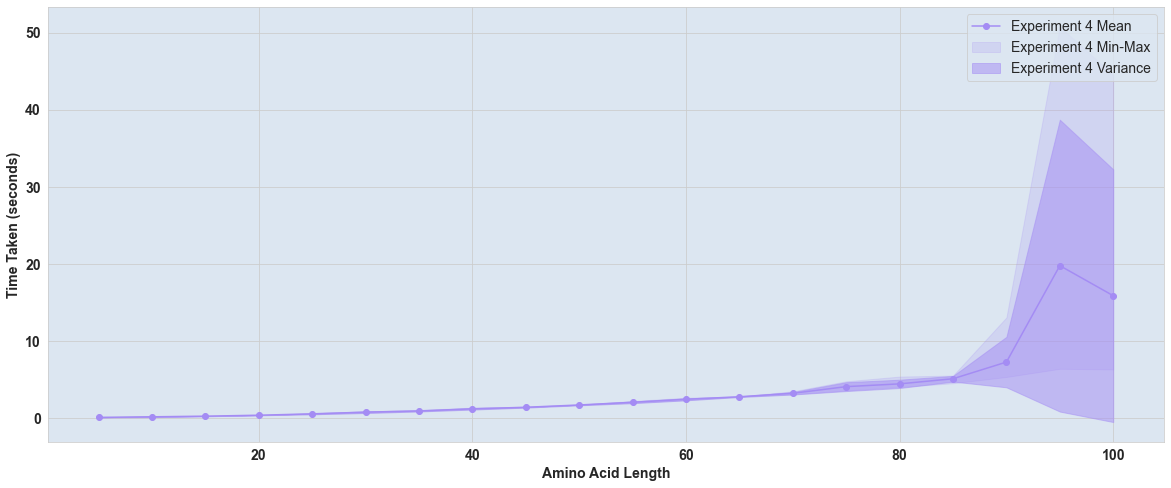

In [25]:
def plot_experiment_descriptives(experiment_data, experiment_name, color):
    plt.figure(figsize=(20, 8))
    # Convert DataFrame columns to NumPy arrays
    amino_acid_length = np.array(experiment_data['Amino Acid Length'])
    mean_time = np.array(experiment_data['Mean_Time'])
    std_time = np.array(experiment_data['Std_Time'])
    max_time = np.array(experiment_data['Max_Time'])
    min_time = np.array(experiment_data['Min_Time'])

    # Plot Mean
    plt.plot(amino_acid_length, mean_time, marker='o', color=color, label=f'{experiment_name} Mean')

    # Plot Min and Max
    plt.fill_between(amino_acid_length, min_time, max_time, color=color, alpha=0.2, label=f'{experiment_name} Min-Max')

    # Plot Variance (Standard Deviation)
    plt.fill_between(amino_acid_length, mean_time - std_time, mean_time + std_time, color=color, alpha=0.5, label=f'{experiment_name} Variance')

    # Customize the plot
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.xlabel("Amino Acid Length", fontsize=14, fontweight='bold')
    plt.ylabel("Time Taken (seconds)", fontsize=14, fontweight='bold')
    plt.legend(fontsize='14')
    plt.grid(True)
    plt.show()

# Set the plot style
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})

# Generate a color palette for each experiment
colors = sns.color_palette("husl", 4)

# Plot each experiment's descriptive statistics
plot_experiment_descriptives(experiment_1_descriptives, 'Experiment 1', colors[0])
plot_experiment_descriptives(experiment_2_descriptives, 'Experiment 2', colors[1])
plot_experiment_descriptives(experiment_3_descriptives, 'Experiment 3', colors[2])
plot_experiment_descriptives(experiment_4_descriptives, 'Experiment 4', colors[3])